# Sign Language Detection Model

This notebook is the implementation of a ConvNet to identify a sign language digits using TF Keras Functional API

## Install Packages

In [ ]:
!pip install numpy pandas tensorflow

## Import Packages

In [1]:
import math
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import PIL as Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, ReLU, MaxPool2D, Flatten, Dense
from tensorflow.keras import Model
from cnn_utils import *

%matplotlib inline

### Load the SIGNS Dataset

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

### Example of an image from the dataset

y =  0


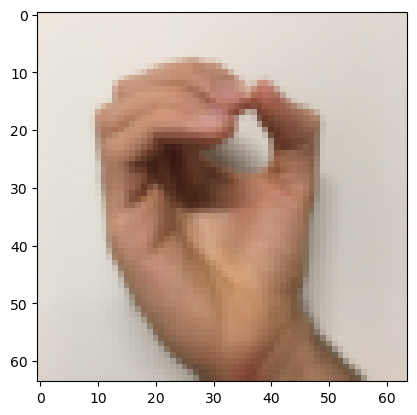

In [3]:
index = 1
plt.imshow(X_train_orig[index])
print('y = ', str(np.squeeze(Y_train_orig[:, index])))

### Split the Data into Train/Test Sets

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


### Forward Propagation

In [5]:
def convolutional_model(input_shape):
    input_image = Input(shape=input_shape)
    
    Z1 = Conv2D(filters=8, kernel_size=(4, 4), strides=(1, 1), padding='same')(input_image)
    A1 = ReLU()(Z1)
    P1 = MaxPool2D(pool_size=(8,8), padding='same')(A1)
    
    Z2 = Conv2D(filters=16, kernel_size=(2,2), strides=(1,1), padding='same')(P1)
    A2 = ReLU()(Z2)
    P2 = MaxPool2D(pool_size=(4,4), strides=(4,4), padding='same')(A2)
    
    F = Flatten()(P2)
    
    outputs = Dense(units=6, activation='softmax')(F)
    
    model = Model(inputs=input_image, outputs=outputs)
    
    return model

In [6]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 8)           0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

### Train the Model

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=500, validation_data=test_dataset)

Epoch 1/500
17/17 [==============================] - 5s 129ms/step - loss: 1.8127 - accuracy: 0.1593 - val_loss: 1.7913 - val_accuracy: 0.1750
Epoch 2/500
17/17 [==============================] - 2s 89ms/step - loss: 1.7886 - accuracy: 0.1898 - val_loss: 1.7833 - val_accuracy: 0.2333
Epoch 3/500
17/17 [==============================] - 2s 90ms/step - loss: 1.7830 - accuracy: 0.2130 - val_loss: 1.7802 - val_accuracy: 0.2583
Epoch 4/500
17/17 [==============================] - 2s 96ms/step - loss: 1.7798 - accuracy: 0.2278 - val_loss: 1.7745 - val_accuracy: 0.2833
Epoch 5/500
17/17 [==============================] - 2s 93ms/step - loss: 1.7735 - accuracy: 0.2713 - val_loss: 1.7664 - val_accuracy: 0.4000
Epoch 6/500
17/17 [==============================] - 2s 96ms/step - loss: 1.7660 - accuracy: 0.3120 - val_loss: 1.7579 - val_accuracy: 0.4083
Epoch 7/500
17/17 [==============================] - 2s 91ms/step - loss: 1.7572 - accuracy: 0.3407 - val_loss: 1.7495 - val_accuracy: 0.3417
Epoch

17/17 [==============================] - 2s 91ms/step - loss: 0.6866 - accuracy: 0.7769 - val_loss: 0.8129 - val_accuracy: 0.6500
Epoch 59/500
17/17 [==============================] - 2s 95ms/step - loss: 0.6781 - accuracy: 0.7787 - val_loss: 0.8062 - val_accuracy: 0.6500
Epoch 60/500
17/17 [==============================] - 2s 95ms/step - loss: 0.6704 - accuracy: 0.7815 - val_loss: 0.7997 - val_accuracy: 0.6500
Epoch 61/500
17/17 [==============================] - 2s 97ms/step - loss: 0.6626 - accuracy: 0.7852 - val_loss: 0.7936 - val_accuracy: 0.6500
Epoch 62/500
17/17 [==============================] - 2s 91ms/step - loss: 0.6550 - accuracy: 0.7870 - val_loss: 0.7882 - val_accuracy: 0.6500
Epoch 63/500
17/17 [==============================] - 1s 89ms/step - loss: 0.6481 - accuracy: 0.7907 - val_loss: 0.7825 - val_accuracy: 0.6500
Epoch 64/500
17/17 [==============================] - 2s 97ms/step - loss: 0.6410 - accuracy: 0.7935 - val_loss: 0.7770 - val_accuracy: 0.6667
Epoch 65/500

17/17 [==============================] - 1s 85ms/step - loss: 0.4246 - accuracy: 0.8713 - val_loss: 0.6289 - val_accuracy: 0.7583
Epoch 116/500
17/17 [==============================] - 1s 85ms/step - loss: 0.4213 - accuracy: 0.8722 - val_loss: 0.6276 - val_accuracy: 0.7583
Epoch 117/500
17/17 [==============================] - 2s 94ms/step - loss: 0.4186 - accuracy: 0.8750 - val_loss: 0.6240 - val_accuracy: 0.7583
Epoch 118/500
17/17 [==============================] - 1s 89ms/step - loss: 0.4157 - accuracy: 0.8778 - val_loss: 0.6208 - val_accuracy: 0.7583
Epoch 119/500
17/17 [==============================] - 2s 93ms/step - loss: 0.4128 - accuracy: 0.8778 - val_loss: 0.6178 - val_accuracy: 0.7583
Epoch 120/500
17/17 [==============================] - 2s 94ms/step - loss: 0.4097 - accuracy: 0.8787 - val_loss: 0.6160 - val_accuracy: 0.7500
Epoch 121/500
17/17 [==============================] - 2s 94ms/step - loss: 0.4074 - accuracy: 0.8833 - val_loss: 0.6119 - val_accuracy: 0.7583
Epoch 

Epoch 172/500
17/17 [==============================] - 2s 94ms/step - loss: 0.3033 - accuracy: 0.9176 - val_loss: 0.5397 - val_accuracy: 0.7917
Epoch 173/500
17/17 [==============================] - 2s 96ms/step - loss: 0.3022 - accuracy: 0.9157 - val_loss: 0.5386 - val_accuracy: 0.7917
Epoch 174/500
17/17 [==============================] - 2s 94ms/step - loss: 0.2998 - accuracy: 0.9167 - val_loss: 0.5376 - val_accuracy: 0.7917
Epoch 175/500
17/17 [==============================] - 2s 96ms/step - loss: 0.2990 - accuracy: 0.9185 - val_loss: 0.5367 - val_accuracy: 0.7917
Epoch 176/500
17/17 [==============================] - 2s 90ms/step - loss: 0.2965 - accuracy: 0.9185 - val_loss: 0.5358 - val_accuracy: 0.7917
Epoch 177/500
17/17 [==============================] - 2s 94ms/step - loss: 0.2955 - accuracy: 0.9167 - val_loss: 0.5352 - val_accuracy: 0.7917
Epoch 178/500
17/17 [==============================] - 2s 97ms/step - loss: 0.2937 - accuracy: 0.9204 - val_loss: 0.5336 - val_accuracy:

Epoch 229/500
17/17 [==============================] - 2s 89ms/step - loss: 0.2248 - accuracy: 0.9352 - val_loss: 0.4919 - val_accuracy: 0.7833
Epoch 230/500
17/17 [==============================] - 1s 88ms/step - loss: 0.2235 - accuracy: 0.9352 - val_loss: 0.4915 - val_accuracy: 0.7833
Epoch 231/500
17/17 [==============================] - 2s 92ms/step - loss: 0.2223 - accuracy: 0.9352 - val_loss: 0.4906 - val_accuracy: 0.7917
Epoch 232/500
17/17 [==============================] - 2s 91ms/step - loss: 0.2217 - accuracy: 0.9333 - val_loss: 0.4902 - val_accuracy: 0.7917
Epoch 233/500
17/17 [==============================] - 2s 93ms/step - loss: 0.2200 - accuracy: 0.9361 - val_loss: 0.4899 - val_accuracy: 0.7833
Epoch 234/500
17/17 [==============================] - 2s 95ms/step - loss: 0.2197 - accuracy: 0.9352 - val_loss: 0.4878 - val_accuracy: 0.7917
Epoch 235/500
17/17 [==============================] - 2s 98ms/step - loss: 0.2178 - accuracy: 0.9361 - val_loss: 0.4873 - val_accuracy:

Epoch 286/500
17/17 [==============================] - 2s 96ms/step - loss: 0.1679 - accuracy: 0.9565 - val_loss: 0.4603 - val_accuracy: 0.8000
Epoch 287/500
17/17 [==============================] - 2s 95ms/step - loss: 0.1666 - accuracy: 0.9565 - val_loss: 0.4601 - val_accuracy: 0.8000
Epoch 288/500
17/17 [==============================] - 2s 94ms/step - loss: 0.1659 - accuracy: 0.9574 - val_loss: 0.4605 - val_accuracy: 0.8000
Epoch 289/500
17/17 [==============================] - 1s 88ms/step - loss: 0.1652 - accuracy: 0.9574 - val_loss: 0.4596 - val_accuracy: 0.8000
Epoch 290/500
17/17 [==============================] - 2s 93ms/step - loss: 0.1643 - accuracy: 0.9602 - val_loss: 0.4597 - val_accuracy: 0.8000
Epoch 291/500
17/17 [==============================] - 2s 93ms/step - loss: 0.1635 - accuracy: 0.9574 - val_loss: 0.4594 - val_accuracy: 0.8000
Epoch 292/500
17/17 [==============================] - 2s 94ms/step - loss: 0.1626 - accuracy: 0.9583 - val_loss: 0.4602 - val_accuracy:

Epoch 343/500
17/17 [==============================] - 2s 94ms/step - loss: 0.1269 - accuracy: 0.9704 - val_loss: 0.4594 - val_accuracy: 0.8167
Epoch 344/500
17/17 [==============================] - 2s 96ms/step - loss: 0.1262 - accuracy: 0.9704 - val_loss: 0.4606 - val_accuracy: 0.8167
Epoch 345/500
17/17 [==============================] - 2s 97ms/step - loss: 0.1256 - accuracy: 0.9704 - val_loss: 0.4602 - val_accuracy: 0.8167
Epoch 346/500
17/17 [==============================] - 2s 97ms/step - loss: 0.1255 - accuracy: 0.9704 - val_loss: 0.4620 - val_accuracy: 0.8250
Epoch 347/500
17/17 [==============================] - 2s 94ms/step - loss: 0.1242 - accuracy: 0.9704 - val_loss: 0.4614 - val_accuracy: 0.8167
Epoch 348/500
17/17 [==============================] - 2s 92ms/step - loss: 0.1240 - accuracy: 0.9704 - val_loss: 0.4599 - val_accuracy: 0.8250
Epoch 349/500
17/17 [==============================] - 1s 88ms/step - loss: 0.1234 - accuracy: 0.9704 - val_loss: 0.4609 - val_accuracy:

Epoch 400/500
17/17 [==============================] - 2s 93ms/step - loss: 0.0997 - accuracy: 0.9769 - val_loss: 0.4961 - val_accuracy: 0.8417
Epoch 401/500
17/17 [==============================] - 2s 110ms/step - loss: 0.0989 - accuracy: 0.9796 - val_loss: 0.4979 - val_accuracy: 0.8417
Epoch 402/500
17/17 [==============================] - 2s 113ms/step - loss: 0.0985 - accuracy: 0.9787 - val_loss: 0.5006 - val_accuracy: 0.8417
Epoch 403/500
17/17 [==============================] - 2s 119ms/step - loss: 0.0976 - accuracy: 0.9796 - val_loss: 0.5063 - val_accuracy: 0.8417
Epoch 404/500
17/17 [==============================] - 2s 108ms/step - loss: 0.0974 - accuracy: 0.9769 - val_loss: 0.5076 - val_accuracy: 0.8417
Epoch 405/500
17/17 [==============================] - 2s 91ms/step - loss: 0.0962 - accuracy: 0.9769 - val_loss: 0.5078 - val_accuracy: 0.8417
Epoch 406/500
17/17 [==============================] - 2s 104ms/step - loss: 0.0959 - accuracy: 0.9769 - val_loss: 0.5101 - val_accu

Epoch 457/500
17/17 [==============================] - 2s 97ms/step - loss: 0.0656 - accuracy: 0.9926 - val_loss: 0.5215 - val_accuracy: 0.8333
Epoch 458/500
17/17 [==============================] - 2s 93ms/step - loss: 0.0660 - accuracy: 0.9907 - val_loss: 0.5215 - val_accuracy: 0.8333
Epoch 459/500
17/17 [==============================] - 2s 91ms/step - loss: 0.0649 - accuracy: 0.9926 - val_loss: 0.5246 - val_accuracy: 0.8333
Epoch 460/500
17/17 [==============================] - 1s 88ms/step - loss: 0.0654 - accuracy: 0.9926 - val_loss: 0.5217 - val_accuracy: 0.8417
Epoch 461/500
17/17 [==============================] - 2s 92ms/step - loss: 0.0643 - accuracy: 0.9944 - val_loss: 0.5243 - val_accuracy: 0.8417
Epoch 462/500
17/17 [==============================] - 2s 93ms/step - loss: 0.0640 - accuracy: 0.9935 - val_loss: 0.5272 - val_accuracy: 0.8333
Epoch 463/500
17/17 [==============================] - 2s 90ms/step - loss: 0.0639 - accuracy: 0.9935 - val_loss: 0.5270 - val_accuracy:

### History Object

In [8]:
history.history

{'loss': [1.8127400875091553,
  1.7885797023773193,
  1.7829768657684326,
  1.779847264289856,
  1.7735438346862793,
  1.7659674882888794,
  1.7571640014648438,
  1.7470425367355347,
  1.7349218130111694,
  1.7189892530441284,
  1.6967841386795044,
  1.6650570631027222,
  1.632620930671692,
  1.5954533815383911,
  1.559637188911438,
  1.520999550819397,
  1.4828884601593018,
  1.4446300268173218,
  1.4082868099212646,
  1.3716446161270142,
  1.3372480869293213,
  1.3040781021118164,
  1.2707395553588867,
  1.2392570972442627,
  1.207610845565796,
  1.1785812377929688,
  1.1512720584869385,
  1.1217793226242065,
  1.0981054306030273,
  1.074143886566162,
  1.0494176149368286,
  1.0286613702774048,
  1.0085333585739136,
  0.9881799817085266,
  0.9691891074180603,
  0.9525260925292969,
  0.9350288510322571,
  0.9178406596183777,
  0.901902437210083,
  0.8867731690406799,
  0.8714218139648438,
  0.8579700589179993,
  0.8447832465171814,
  0.8314403295516968,
  0.8186531662940979,
  0.80602

Now we can visualize the loss over time using `history.history`:

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

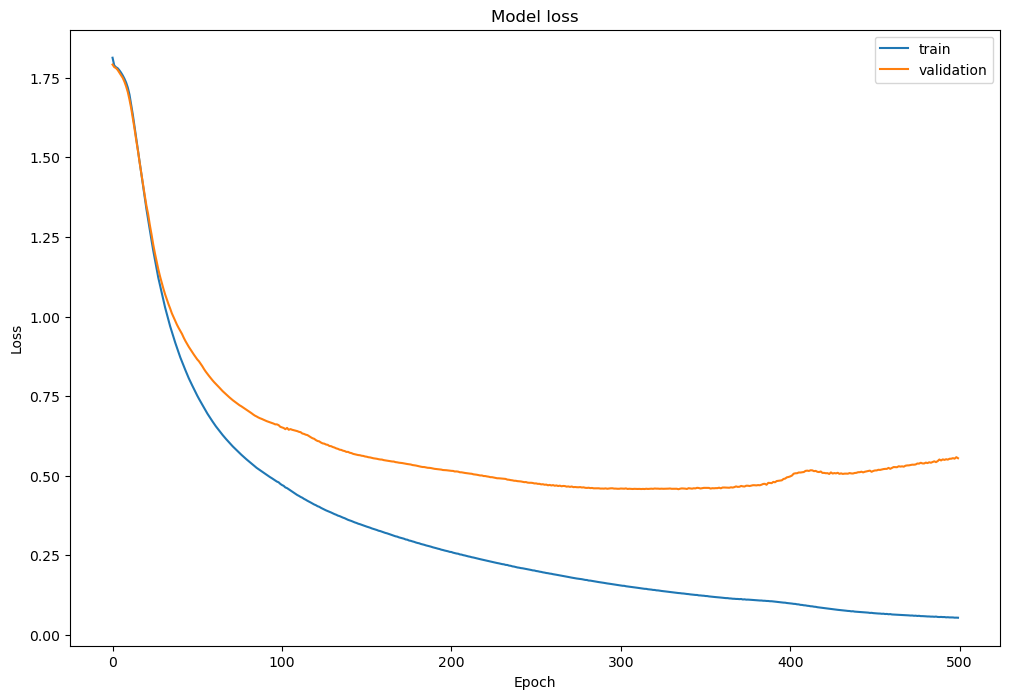

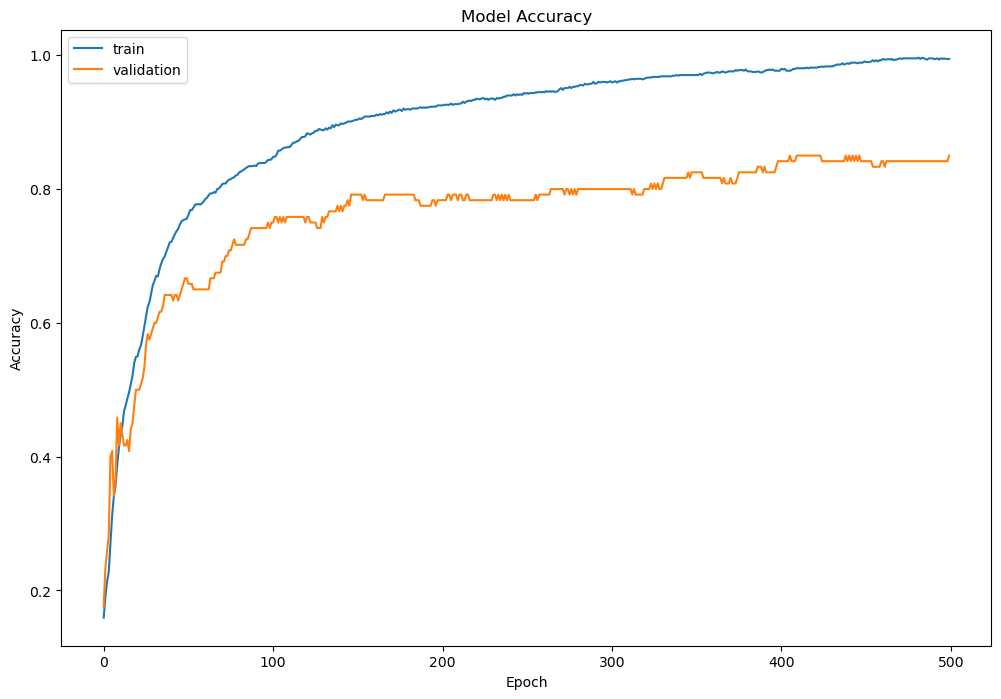

In [10]:
pd.options.mode.chained_assignment = None
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

We have an accuracy of 84% in validation set!